In [1]:
import math

def inv_generalized_gamma_pdf(x, a, b, c):
    
    if x <= 0 or a <= 0 or b <= 0 or c <= 0:
        return 0
    return ((a*(b**(a*c))) /  math.gamma(c)) * (x ** (-a*c - 1)) * math.exp(-(b / x) ** a)


In [2]:
 inv_generalized_gamma_pdf(0.5, 1, 2, 3)

1.1722008888789874

In [3]:
import scipy.integrate as integrate
import scipy.optimize as optimize

def calculate_median(pdf, params, lower_bound=0, upper_bound=10, tol=1e-6):
    """ Calculate the median of a probability density function (PDF) numerically."""
    # Define a CDF function from -infinity to x
    def cdf(x):
        return integrate.quad(lambda t: pdf(t, *params), -float('inf'), x)[0]

    # Define a function to find the root of: CDF(x) - 0.5 = 0
    def root_function(x):
        return cdf(x) - 0.5

    # Use a root-finding method to find the median
    median, result = optimize.brentq(root_function, lower_bound, upper_bound, xtol=tol, full_output=True)
    
    if result.converged:
        return median
    else:
        raise ValueError("Median calculation did not converge.")

# Example usage with a normal distribution PDF
import math
median = calculate_median(inv_generalized_gamma_pdf, params=(1, 2,3))
print("Median:", median)
print("#"*50)
# Define a normal distribution PDF with mean mu and standard deviation sigma
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Calculate the median of a normal distribution with mean=0 and std=1
median = calculate_median(normal_pdf, params=(3, 10))
print("Median:", median)  # Should be close to 0 for a standard normal distribution

Median: 0.7479261864055847
##################################################
Median: 3.0000000597088277


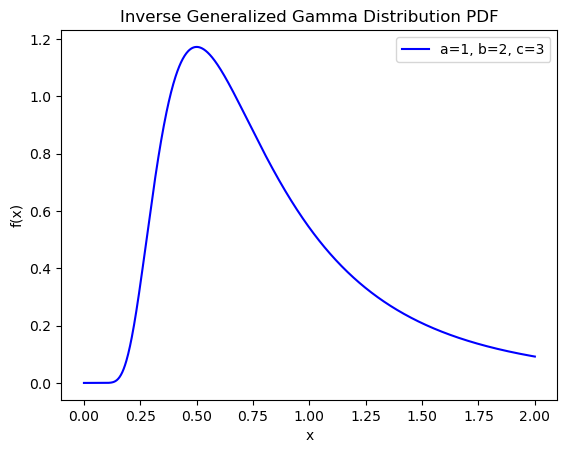

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

def inv_generalized_gamma_pdf(x, a, b, c):
    """
    PDF of the generalized gamma distribution.
    
    Parameters:
    x (float): Value at which to evaluate the PDF.
    a (float): Scale parameter (a > 0).
    d (float): Shape parameter (b > 0).
    p (float): Shape parameter (c > 0).
    
    Returns:
    float: PDF value at x.
    """
    if x <= 0 or a <= 0 or b <= 0 or c <= 0:
        return 0
    return ((a*(b**(a*c))) /  math.gamma(c)) * (x ** (-a*c - 1)) * math.exp(-(b / x) ** a)


def plot_inv_generalized_gamma_pdf(a, b, c, x_range=(0, 4), num_points=1000):
    """
    Plot the generalized gamma distribution PDF with given parameters.
    
    Parameters:
    a (float): Scale parameter (a > 0).
    d (float): Shape parameter (d > 0).
    p (float): Shape parameter (p > 0).
    x_range (tuple): Range of x values as (xmin, xmax).
    num_points (int): Number of points to plot.
    
    Returns:
    None
    """
    # Generate x values
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    
    # Compute y values by applying the generalized gamma PDF
    y_values = [inv_generalized_gamma_pdf(x, a, b, c) for x in x_values]
    
    # Plot the PDF
    plt.plot(x_values, y_values, label=f'a={a}, b={b}, c={c}', color='blue')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Inverse Generalized Gamma Distribution PDF')
    plt.legend()
    plt.grid(False)
    plt.show()

# Example usage
a = 1    # Scale parameter
b = 2    # Shape parameter
c = 3   # Shape parameter
plot_inv_generalized_gamma_pdf(a, b, c, x_range=(0, 2))
